In [36]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LogNorm 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
from IGTD_Functions import min_max_transform, table_to_image
from tab2img.converter import Tab2Img
import pywt
from scipy import signal
from termcolor import colored
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [37]:
def data_load(name):
    data = pd.read_csv(name)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(data[['Scaled_CAN_ID']])
    Final_data = pd.DataFrame(pd.concat([data[['CAN_ID']], 
                                         pd.DataFrame(scaled, columns=['Scaled_CAN_ID']), data[['Time_Gap']]], axis=1))
    return Final_data

In [38]:
def bin_conv(df_id):
    scale = 16 ## equals to hexadecimal
    num_of_bits = 11
    bin_conv_out = []
    for i in np.array(df_id):
        bin_conv_out.append(bin(int(str(i), scale))[2:].zfill(num_of_bits))
    return bin_conv_out

In [39]:
def countSetBits(n):
    count = 0
    while (n):
        count += n & 1
        n >>= 1
    return count

In [40]:
def xor_data(df):
    bin1 = '00000000000'
    bin_df = bin_conv(df)
    xor_out = []
    hamming_out = []
    for i in bin_df:
        xor_out.append(bin(int(bin1,2)^int(i,2))[2:].zfill(29))
        bin1 = i
    for i in xor_out:
        hamming_out.append(countSetBits(int(i,2)))    
    
    return hamming_out

In [41]:
def segment(df, time_gap):
    timestamp = time_gap
    length = len(df)
    output = []
    for i in range(timestamp, length, 100):
        if i >= length - time_gap:
            break
        else:
            output.append(np.array(df[i-timestamp:i][['Scaled_CAN_ID', 'Time_Gap', 'Hamming_Distance_ID']]))
        
    return output

In [42]:
def img_prep(input_df, amt):
    data = data_load(input_df)
    scaler = MinMaxScaler(feature_range=(0, 1))
    xor_data_ = np.array(xor_data(np.array(data['CAN_ID'])))
    data['Hamming_Distance_ID'] = scaler.fit_transform(xor_data_.reshape(xor_data_.shape[0],1))
    seg = segment(data, amt)
    return seg

In [49]:
def conv_img_sns(save_result, input_df, file_name):
    j = 0
    np.random.seed(101)
    for x in range(len(input_df)):
        sns.set(rc={'figure.figsize':(10,10)})
        sns.heatmap(input_df[x], cmap="tab20", cbar= False)
        plt.grid(False)
        plt.axis('off')
        plt.savefig(save_result + file_name.format(x), bbox_inches ="tight", pad_inches = 0)
        j = j + 1
    print("Done")

In [234]:
data = r"C:\Users\Lisa\Rezanur\Pytorch\Data Set\New_Image_Conv\Tesla_Normal.csv"
out_df = "C:/Users/Lisa/Rezanur/Pytorch/Data Set/New_Image_Conv/Normal Seg Img/Test/Normal/"

In [235]:
output = img_prep(data, 100)
len(output)

15738

Done


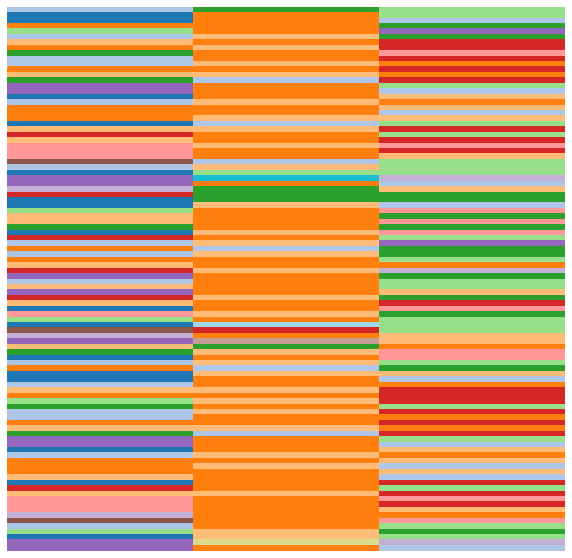

In [236]:
conv_img_sns(out_df, output[:500], "Tesla_Normal_b1_{}")

Done


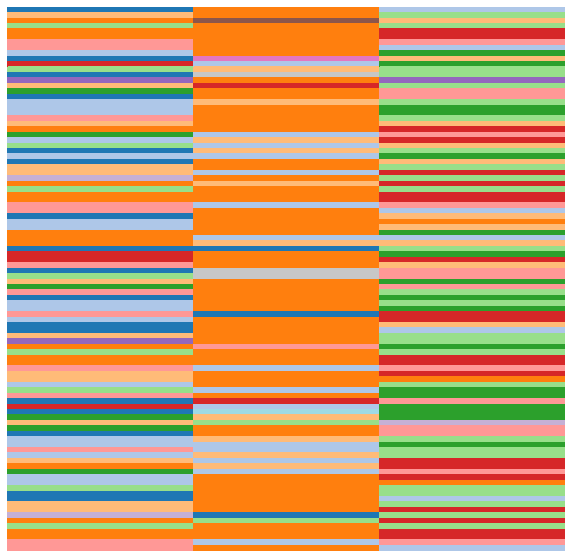

In [237]:
conv_img_sns(out_df, output[500:1000], "Tesla_Normal_b2_{}")

Done


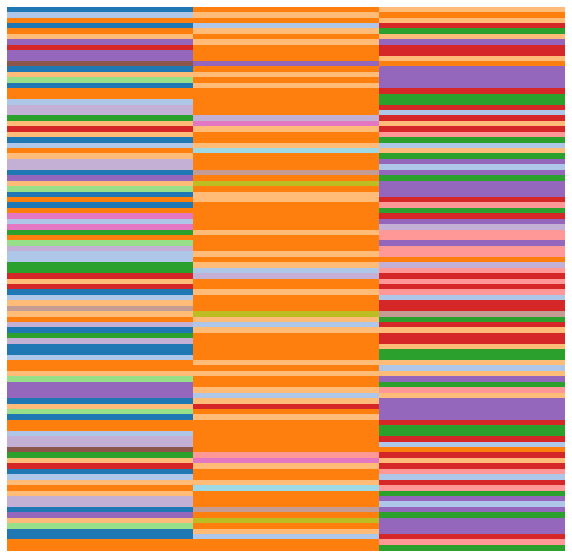

In [238]:
conv_img_sns(out_df, output[1000:1500], "Tesla_Normal_b3_{}")

Done


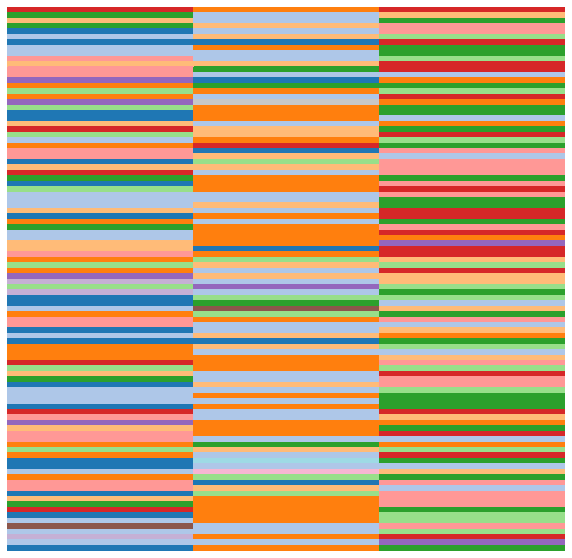

In [239]:
conv_img_sns(out_df, output[1500:2000], "Tesla_Normal_b4_{}")

Done


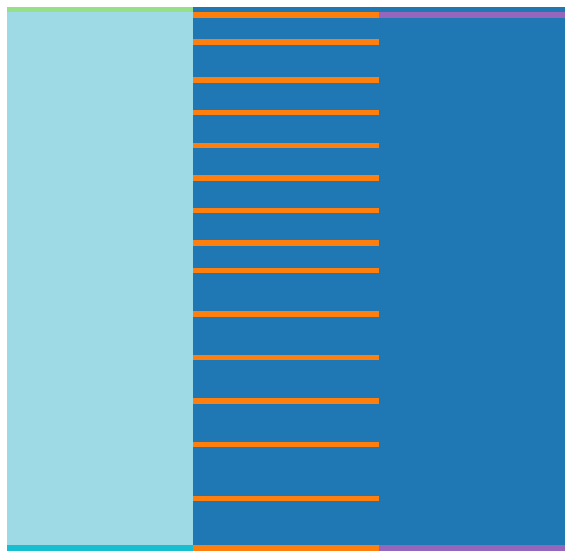

In [177]:
conv_img_sns(out_df, output[2000:2500], "BMW_Fuzz_a5_{}")

Done


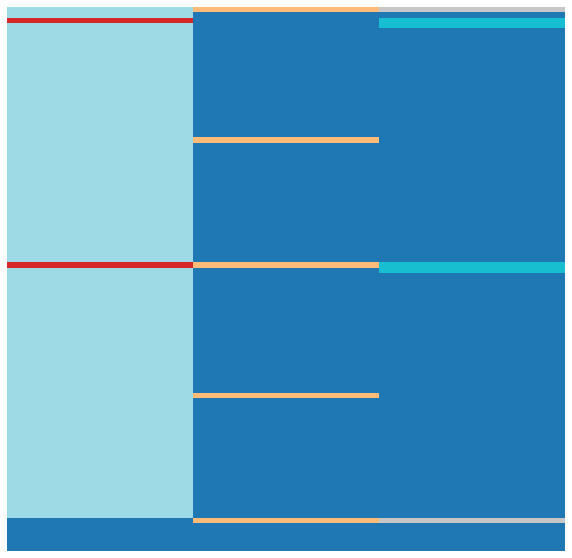

In [178]:
conv_img_sns(out_df, output[2500:3000], "BMW_Fuzz_a6_{}")

Done


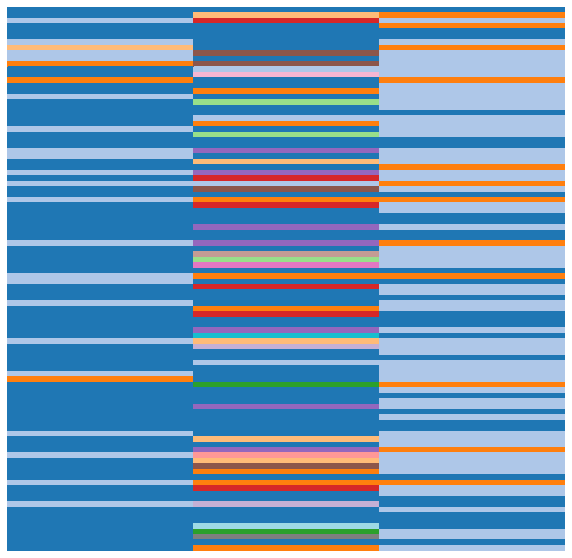

In [169]:
conv_img_sns(out_df, output[3000:3500], "BMW_Normal_a7_{}")

Done


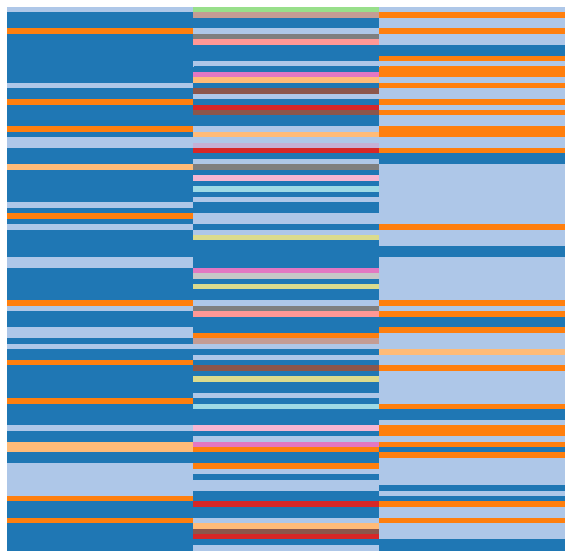

In [170]:
conv_img_sns(out_df, output[3500:4000], "BMW_Normal_{}")

In [70]:
conv_img_sns(out_df, output[4000:], "Sonata_Replay_a9_{}")

Done
